# saturation vapor pressure over ice

## Clausius-Clapyron review

Recall the notes on the [Clausius-Clapyron equation](https://www.dropbox.com/scl/fi/o7d278acumkgmwe4y6qlu/clausius.pdf?rlkey=ktd5fvdwaz7ishuxozwmf6kwa&dl=0).   In those notes we started from $g_l = g_v$ in equilibrium and derived the relation
between the liquid water temperature and the saturation vapor pressure over liquid water.  Below we repeat this using a result from [Ambaum 2020](https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/qj.3899) that shows how to get
a more accurate values for the saturation vapor pressure over water.  We then use the same approach with $g_{ice} = g_v$ to get the saturation vapor
pressure over ice.

Equation 8:

$$
l_v  =  (\phi_v^* - \phi_l) T
$$ 

and inserting the definition for the two entropies gives equation 18:

$$
\frac{l_v }{T}  = c_{pv} \log \frac{T }{T_p} - R_v \log \frac{ e_{sat} }{e_{s0}} + \frac{l_{v0}}{T_p} - c_l \log \frac{T }{T_p} 
$$
where $T_p$ = 273.16 K, $l_{v0}=2.501$ J/kg and $e_{s0}$ = 611.655 Pa at the triple point.

Also from the CC-notes, we have equation 13:

$$
  l_v = h_v - h_l = (c_{pv} - c_l) (T - T_p) + l_{v0}
$$
where $c_l$ = 4219.9 J/kg/K and $c_{pv}$ = 1884 J/kg/K at the triple point (Lohmann chapter 2)



Rewriting the constant of integration $\phi_0 = \frac{l_{v0}}{T_p}$ rearranging:

$$
\frac{l_v }{T} - \frac{l_{v0}}{T_p}  =( c_{pv} - c_{l} ) \log \frac{T }{T_p} - R_v \log \frac{ e_{sat} }{e_{s0}}
$$

Exponentiate to get the saturation vapor pressure with respect to liquid

$$
e_{sat}=e_{\mathrm{s} 0}\left(\frac{T_p}{T}\right)^{\left(c_{\mathrm{pl}}-c_{\mathrm{pv}}\right) / R_{\mathrm{v}}} \exp \left(\frac{l_{v0}}{R_{\mathrm{v}} T_p}-\frac{l_v}{R_{\mathrm{v}} T}\right)
$$(eq:liquid)

We need a value for the difference $c_{pv} - c_l$, which depends on temperature over large temperature ranges between 0 to 100 deg C.
[Ambaum 2020](https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/qj.3899) shows that a good average value is:

$$
c_l - c_{pv} = 2180\ J/kg/K
$$


## Plot the new esat function vs. old version

Compare this with the empircal verions given by Thompkins eq. 2.13 (with T in deg C):

$$
e_s(T)=611.2 \exp \left(\frac{17.67 T}{T+243.5}\right)
$$

In [1]:
from a405.thermo.constants import constants as c
def esat_new(T):
    """
    saturation vapor pressure with respect to liquid
     
    Parameters
    ----------
    
    T: temperature (K)
    
    Returns
    -------
    
    ear_out: vapor pressure (Pa)
    """
    cl_cpv = 2180  #J/kg/K
    term1 = c.es0*100.*(c.Tp/T)**(cl_cpv/c.Rv)
    term2 = c.lv0/(c.Rv*c.Tp)
    lv = -cl_cpv*(T - c.Tp) + c.lv0
    term3 = lv/(c.Rv*T)
    esat_out=term1*np.exp((term2 - term3))
    return esat_out

def esat_old(T):
    """
    empirical fit from Thompkins 2.13
    """
    tempC = T - c.Tc
    term1 = np.exp(17.67*tempC/(tempC + 243.5))
    esat_out = 611.2*term1
    return esat_out
            

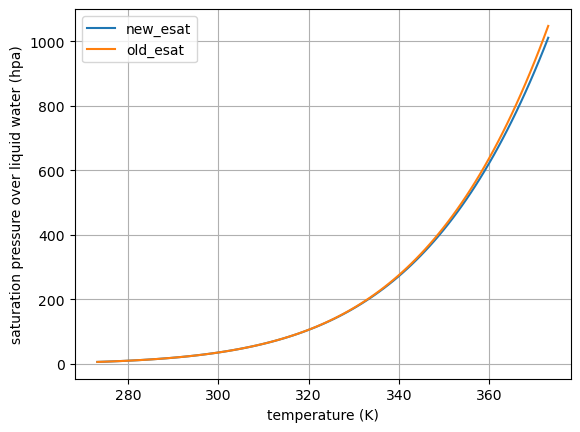

In [2]:
from matplotlib import pyplot as plt
import numpy as np
the_temps = np.linspace(0,100,100) + c.Tc
new_esat = esat_new(the_temps)
old_esat = esat_old(the_temps)

fig,ax =plt.subplots(1,1)
pa2hPa  = 0.01
ax.plot(the_temps,new_esat*pa2hPa,label="new_esat")
ax.plot(the_temps,old_esat*pa2hPa,label="old_esat")
ax.grid(True)
ax.set(xlabel="temperature (K)",
       ylabel="saturation pressure over liquid water (hpa)")
ax.legend();

## Repeat this over ice

The only things we need to change when we shift from liquid to ice is to change the heat capacity of liquid $c_l$ to the
heat capcity of ice $c_i$.  The new latent heat, which is the enthalpy change from ice to vapor is called the latent
heat of sublimation $l_s$ and is given by:

$$
  l_s = h_v - h_i = (c_{pv} - c_i) (T - T_p) + l_{s0}
$$
where $l_{s0}$ = $2.834 \times 10^6$ J/kg, $c_{i}$ = 2114 J/kg/K  and $c_{pv}$ = 1884 J/kg/K at the triple point. (Lohmann Table 2.1).

So the version of {eq}`eq:liquid` for ice is:

$$
e_{\mathrm{i}}=e_{\mathrm{i} 0}\left(\frac{T_p}{T}\right)^{\left(c_{\mathrm{pi}}-c_{\mathrm{pv}}\right) / R_{\mathrm{v}}} \exp \left(\frac{l_{\mathrm{s} 0}}{R_{\mathrm{v}} T_p}-\frac{l_{\mathrm{s}}}{R_{\mathrm{v}} T}\right)
$$
where we use the [Ambaum 2020](https://rmets.onlinelibrary.wiley.com/doi/full/10.1002/qj.3899) approximation for the value for $( c_i - c_{pv} )$ = 212 J/kg/K that averages over the temperature range 0 to -40 deg C.

In [3]:
def eice_new(T):
    """
    saturation vapor pressure with respect to ice

    Parameters
    ----------

    T: temperature (K)

    Returns
    -------

    eice_out: vapor pressure (Pa)
    
    """
    ci_cpv = 212  #J/kg/K
    ls0 = 2.834e6
    term1 = c.es0*100.*(c.Tp/T)**(ci_cpv/c.Rv)
    term2 = ls0/(c.Rv*c.Tp)
    ls = -ci_cpv*(T - c.Tp) + ls0
    term3 = ls/(c.Rv*T)
    eice_out=term1*np.exp((term2 - term3))
    return eice_out

## Evaluate the ratio of saturation vapor with respect to liquid over ice

In [4]:
the_temps = np.linspace(-40,0,100) + c.Tc
eice = eice_new(the_temps)
esat = esat_new(the_temps)

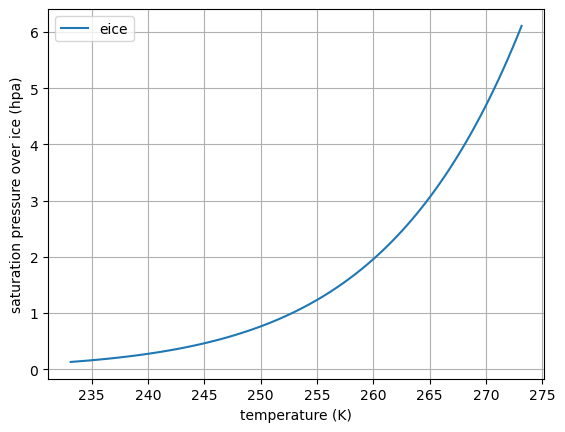

In [5]:
fig,ax =plt.subplots(1,1)
pa2hPa  = 0.01
ax.plot(the_temps,eice*pa2hPa,label="eice")
ax.grid(True)
ax.set(xlabel="temperature (K)",
       ylabel="saturation pressure over ice (hpa)")
ax.legend();

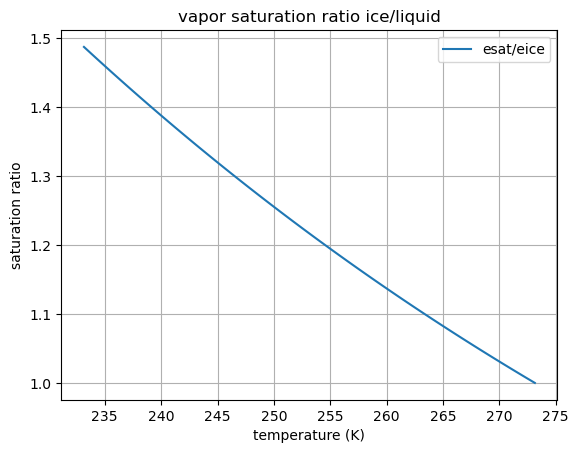

In [6]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax =plt.subplots(1,1)
pa2hPa  = 0.01
ax.plot(the_temps,esat/eice,label="esat/eice")
ax.grid(True)
ax.set(xlabel="temperature (K)",
       ylabel="saturation ratio",
       title = "vapor saturation ratio ice/liquid")
ax.legend();

## Recreate Thompkins figure 2.8

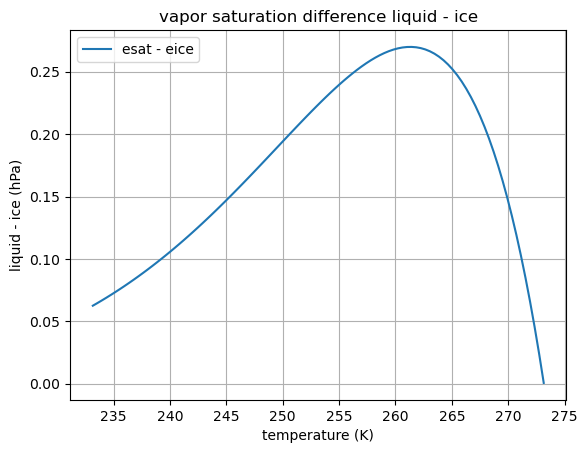

In [9]:
fig,ax =plt.subplots(1,1)
pa2hPa  = 0.01
ax.plot(the_temps,(esat - eice)*pa2hPa,label="esat - eice")
ax.grid(True)
ax.set(xlabel="temperature (K)",
       ylabel="liquid - ice (hPa)",
       title = "vapor saturation difference liquid - ice")
ax.legend();